<FONT COLOR="RED" SIZE="6">FEATURE SELECTION: Wrapper Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">4_Wrapper_Methods_EFS</FONT>

The Exhaustive Feature Selector is a brute-force approach to feature selection. It evaluates all possible combinations of features to find the best subset based on a scoring metric. While computationally expensive, it is a thorough method when the dataset has a small number of features.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

In [3]:
# Perform Exhaustive Feature Selection
efs = EFS(
    estimator=clf,
    min_features=1,
    max_features=X_train.shape[1],
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)


In [4]:
efs = efs.fit(X_train, y_train)

Features: 8191/8191

In [5]:
# Best feature combination
best_features = list(efs.best_idx_)
best_feature_names = np.array(feature_names)[best_features]
print("Best features:", best_feature_names)

Best features: ['alcohol' 'ash' 'alcalinity_of_ash' 'magnesium' 'flavanoids'
 'proanthocyanins' 'hue' 'proline']


In [6]:
# Evaluate model with selected features
clf.fit(X_train[:, best_features], y_train)
accuracy = clf.score(X_test[:, best_features], y_test)
print(f"Test accuracy with selected features: {accuracy:.2f}")

Test accuracy with selected features: 0.98


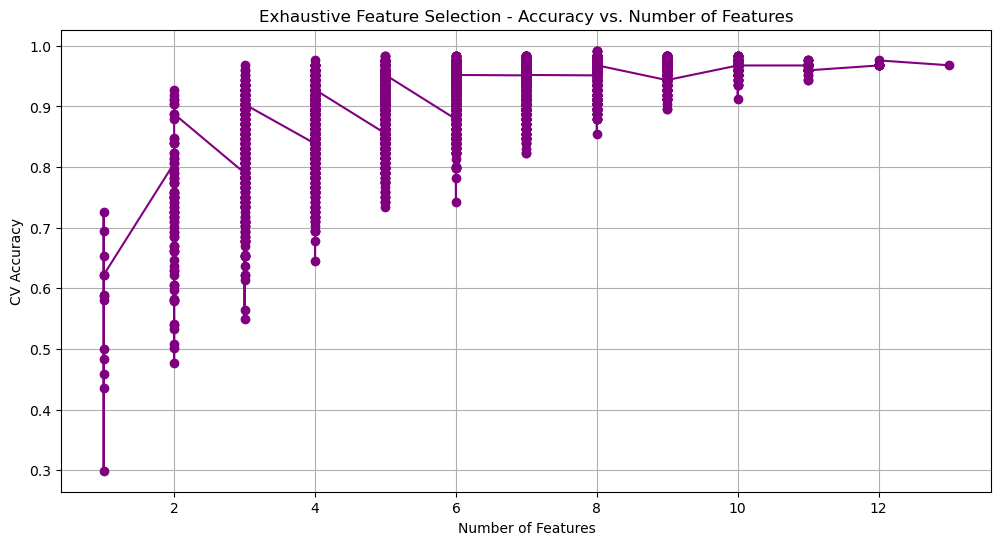

In [7]:
# Plot feature selection results
scores = [score for score in efs.subsets_.values()]
feature_counts = [len(subset["feature_idx"]) for subset in efs.subsets_.values()]
accuracies = [subset["avg_score"] for subset in efs.subsets_.values()]

plt.figure(figsize=(12, 6))
plt.plot(feature_counts, accuracies, marker="o", color="purple")
plt.xlabel("Number of Features")
plt.ylabel("CV Accuracy")
plt.title("Exhaustive Feature Selection - Accuracy vs. Number of Features")
plt.grid()
plt.show()

In [9]:
import pandas as pd
pd.DataFrame.from_dict(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.52, 0.68, 0.64, 0.6, 0.6666666666666666]",0.621333,"(0,)",0.073988,0.057565,0.028783
1,"(1,)","[0.48, 0.48, 0.52, 0.56, 0.4583333333333333]",0.499667,"(1,)",0.046468,0.036154,0.018077
2,"(2,)","[0.52, 0.36, 0.4, 0.48, 0.4166666666666667]",0.435333,"(2,)",0.07369,0.057333,0.028667
3,"(3,)","[0.48, 0.4, 0.52, 0.56, 0.4583333333333333]",0.483667,"(3,)",0.069933,0.05441,0.027205
4,"(4,)","[0.48, 0.4, 0.48, 0.52, 0.4166666666666667]",0.459333,"(4,)",0.057121,0.044442,0.022221
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[1.0, 0.92, 0.96, 0.96, 1.0]",0.968,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038473,0.029933,0.014967
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[1.0, 0.92, 0.96, 0.96, 1.0]",0.968,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038473,0.029933,0.014967
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[1.0, 0.92, 0.96, 0.96, 1.0]",0.968,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038473,0.029933,0.014967
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[1.0, 0.92, 1.0, 0.96, 1.0]",0.976,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.041129,0.032,0.016


<P><FONT COLOR="yELLOW" SIZE="4">Pros & Cons of Exhaustive Feature Selector:</FONT>

<b>Pros:</b>
<ol>
   <li> Guarantees the identification of the best feature subset.</li>
    <li>Offers insights into the trade-off between the number of features and model performance.</li></ol>

<b>Cons:</b>
<ol>
   <li> Computationally expensive, especially for datasets with many features.</li>
    <li>Not practical for high-dimensional datasets.</li></ol>